Ideas and things we can add:
- Windowing for smoothing sensor-readings
- 

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and understand the dataset

## Import and setup

In [249]:
import os
from pathlib import Path
curr_dir = Path(os.getcwd())
data_dir = curr_dir.parent.parent / "data" / "train_FD001.txt"
df = pd.read_csv(data_dir, delimiter=r"\s+")
df.columns = (
    ["Engine no", "Num cycles", "Operating 1", "Operating 2", "Operating 3"] +
    [f"Sensor {i}" for i in range(df.shape[-1] - 5)]
)

In [250]:
df.describe()

Engine no    Num cycles   Operating 1   Operating 2  Operating 3  \
count  20630.000000  20630.000000  20630.000000  20630.000000      20630.0   
mean      51.509016    108.813088     -0.000009      0.000002        100.0   
std       29.226226     68.878570      0.002187      0.000293          0.0   
min        1.000000      1.000000     -0.008700     -0.000600        100.0   
25%       26.000000     52.000000     -0.001500     -0.000200        100.0   
50%       52.000000    104.000000     -0.000000      0.000000        100.0   
75%       77.000000    156.000000      0.001500      0.000300        100.0   
max      100.000000    362.000000      0.008700      0.000600        100.0   

           Sensor 0      Sensor 1      Sensor 2      Sensor 3      Sensor 4  \
count  2.063000e+04  20630.000000  20630.000000  20630.000000  2.063000e+04   
mean   5.186700e+02    642.680975   1590.523159   1408.934186  1.462000e+01   
std    6.537152e-11      0.500029      6.131295      9.000636  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.330000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.557500  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...     Sensor 11     Sensor 12     Sensor 13     Sensor 14  \
count  ...  20630.000000  20630.000000  20630.000000  20630.000000   
mean   ...    521.413458   2388.096156   8143.752971      8.442147   
std    ...      0.737569      0.071919     19.076605      0.037506   
min    ...    518.690000   2387.880000   8099.940000      8.324900   
25%    ...    520.960000   2388.040000   8133.242500      8.414900   
50%    ...    521.480000   2388.090000   8140.540000      8.438950   
75%    ...    521.950000   2388.140000   8148.310000      8.465600   
max    ...    523.380000   2388.560000   8293.720000      8.584800   

          Sensor 15     Sensor 16  Sensor 17  Sensor 18     Sensor 19  \
count  2.063000e+04  20630.000000    20630.0    20630.0  20630.000000   
mean   3.000000e-02    393.210713     2388.0      100.0     38.816259   
std    1.556432e-14      1.548778        0.0        0.0      0.180743   
min    3.000000e-02    388.000000     2388.0      100.0     38.140000   
25%    3.000000e-02    392.000000     2388.0      100.0     38.700000   
50%    3.000000e-02    393.000000     2388.0      100.0     38.830000   
75%    3.000000e-02    394.000000     2388.0      100.0     38.950000   
max    3.000000e-02    400.000000     2388.0      100.0     39.430000   

          Sensor 20  
count  20630.000000  
mean      23.289699  
std        0.108250  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 26 columns]

In [251]:
df.describe()["Sensor 8"]

count    20630.000000
mean      9065.243864
std         22.083016
min       9021.730000
25%       9053.100000
50%       9060.660000
75%       9069.420000
max       9244.590000
Name: Sensor 8, dtype: float64

In [252]:
df.describe()["Sensor 9"]

count    2.063000e+04
mean     1.300000e+00
std      4.660829e-13
min      1.300000e+00
25%      1.300000e+00
50%      1.300000e+00
75%      1.300000e+00
max      1.300000e+00
Name: Sensor 9, dtype: float64

In [253]:
df.shape

(20630, 26)

In [254]:
train_df = df.drop(
    ["Operating 1", "Operating 2", "Operating 3"] +
    [f"Sensor {i}" for i in [0, 4, 5, 9, 15, 17, 18]],
    axis=1,
    inplace=False
)

In [255]:
train_df.describe()

Engine no    Num cycles      Sensor 1      Sensor 2      Sensor 3  \
count  20630.000000  20630.000000  20630.000000  20630.000000  20630.000000   
mean      51.509016    108.813088    642.680975   1590.523159   1408.934186   
std       29.226226     68.878570      0.500029      6.131295      9.000636   
min        1.000000      1.000000    641.210000   1571.040000   1382.250000   
25%       26.000000     52.000000    642.330000   1586.260000   1402.360000   
50%       52.000000    104.000000    642.640000   1590.100000   1408.040000   
75%       77.000000    156.000000    643.000000   1594.380000   1414.557500   
max      100.000000    362.000000    644.530000   1616.910000   1441.490000   

           Sensor 6      Sensor 7      Sensor 8     Sensor 10     Sensor 11  \
count  20630.000000  20630.000000  20630.000000  20630.000000  20630.000000   
mean     553.367663   2388.096653   9065.243864     47.541172    521.413458   
std        0.885087      0.070987     22.083016      0.267093      0.737569   
min      549.850000   2387.900000   9021.730000     46.850000    518.690000   
25%      552.810000   2388.050000   9053.100000     47.350000    520.960000   
50%      553.440000   2388.090000   9060.660000     47.510000    521.480000   
75%      554.010000   2388.140000   9069.420000     47.700000    521.950000   
max      556.060000   2388.560000   9244.590000     48.530000    523.380000   

          Sensor 12     Sensor 13     Sensor 14     Sensor 16     Sensor 19  \
count  20630.000000  20630.000000  20630.000000  20630.000000  20630.000000   
mean    2388.096156   8143.752971      8.442147    393.210713     38.816259   
std        0.071919     19.076605      0.037506      1.548778      0.180743   
min     2387.880000   8099.940000      8.324900    388.000000     38.140000   
25%     2388.040000   8133.242500      8.414900    392.000000     38.700000   
50%     2388.090000   8140.540000      8.438950    393.000000     38.830000   
75%     2388.140000   8148.310000      8.465600    394.000000     38.950000   
max     2388.560000   8293.720000      8.584800    400.000000     39.430000   

          Sensor 20  
count  20630.000000  
mean      23.289699  
std        0.108250  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400

In [256]:
train_df.head()

Engine no  Num cycles  Sensor 1  Sensor 2  Sensor 3  Sensor 6  Sensor 7  \
0          1           2    642.15   1591.82   1403.14    553.75   2388.04   
1          1           3    642.35   1587.99   1404.20    554.26   2388.08   
2          1           4    642.35   1582.79   1401.87    554.45   2388.11   
3          1           5    642.37   1582.85   1406.22    554.00   2388.06   
4          1           6    642.10   1584.47   1398.37    554.67   2388.02   

   Sensor 8  Sensor 10  Sensor 11  Sensor 12  Sensor 13  Sensor 14  Sensor 16  \
0   9044.07      47.49     522.28    2388.07    8131.49     8.4318        392   
1   9052.94      47.27     522.42    2388.03    8133.23     8.4178        390   
2   9049.48      47.13     522.86    2388.08    8133.83     8.3682        392   
3   9055.15      47.28     522.19    2388.04    8133.80     8.4294        393   
4   9049.68      47.16     521.68    2388.03    8132.85     8.4108        391   

   Sensor 19  Sensor 20  
0      39.00    23.4236  
1      38.95    23.3442  
2      38.88    23.3739  
3      38.90    23.4044  
4      38.98    23.3669

In [257]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Engine no   20630 non-null  int64  
 1   Num cycles  20630 non-null  int64  
 2   Sensor 1    20630 non-null  float64
 3   Sensor 2    20630 non-null  float64
 4   Sensor 3    20630 non-null  float64
 5   Sensor 6    20630 non-null  float64
 6   Sensor 7    20630 non-null  float64
 7   Sensor 8    20630 non-null  float64
 8   Sensor 10   20630 non-null  float64
 9   Sensor 11   20630 non-null  float64
 10  Sensor 12   20630 non-null  float64
 11  Sensor 13   20630 non-null  float64
 12  Sensor 14   20630 non-null  float64
 13  Sensor 16   20630 non-null  int64  
 14  Sensor 19   20630 non-null  float64
 15  Sensor 20   20630 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 2.5 MB


## Understanding the data

In [258]:
def plot_engine_vs_sensors(df, engine_number: int):
    """
    Plots a grid (5, 3) with engine-cycle number vs sensor-data.

    Args:
        engine_number (int): read the var name
    """
    engine_1_data = df[df["Engine no"] == engine_number].drop("Engine no", axis=1)
    fig, axes = plt.subplots(5, 3, figsize=(15, 12))  # Adjust figsize as needed
    axes = axes.flatten()
    fig.suptitle(f"Engine: {engine_number}", fontsize=18)
    
    for i, column in enumerate(engine_1_data.columns):
        axes[i].plot(range(len(engine_1_data[column])), engine_1_data[column])
        axes[i].set_title(column)
        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Value")
        axes[i].grid(True)
    
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    plt.tight_layout()
    plt.show()

In [259]:
train_df.nunique(axis=0)

Engine no      100
Num cycles     362
Sensor 1       310
Sensor 2      3012
Sensor 3      4051
Sensor 6       513
Sensor 7        53
Sensor 8      6403
Sensor 10      159
Sensor 11      427
Sensor 12       56
Sensor 13     6078
Sensor 14     1918
Sensor 16       13
Sensor 19      120
Sensor 20     4745
dtype: int64

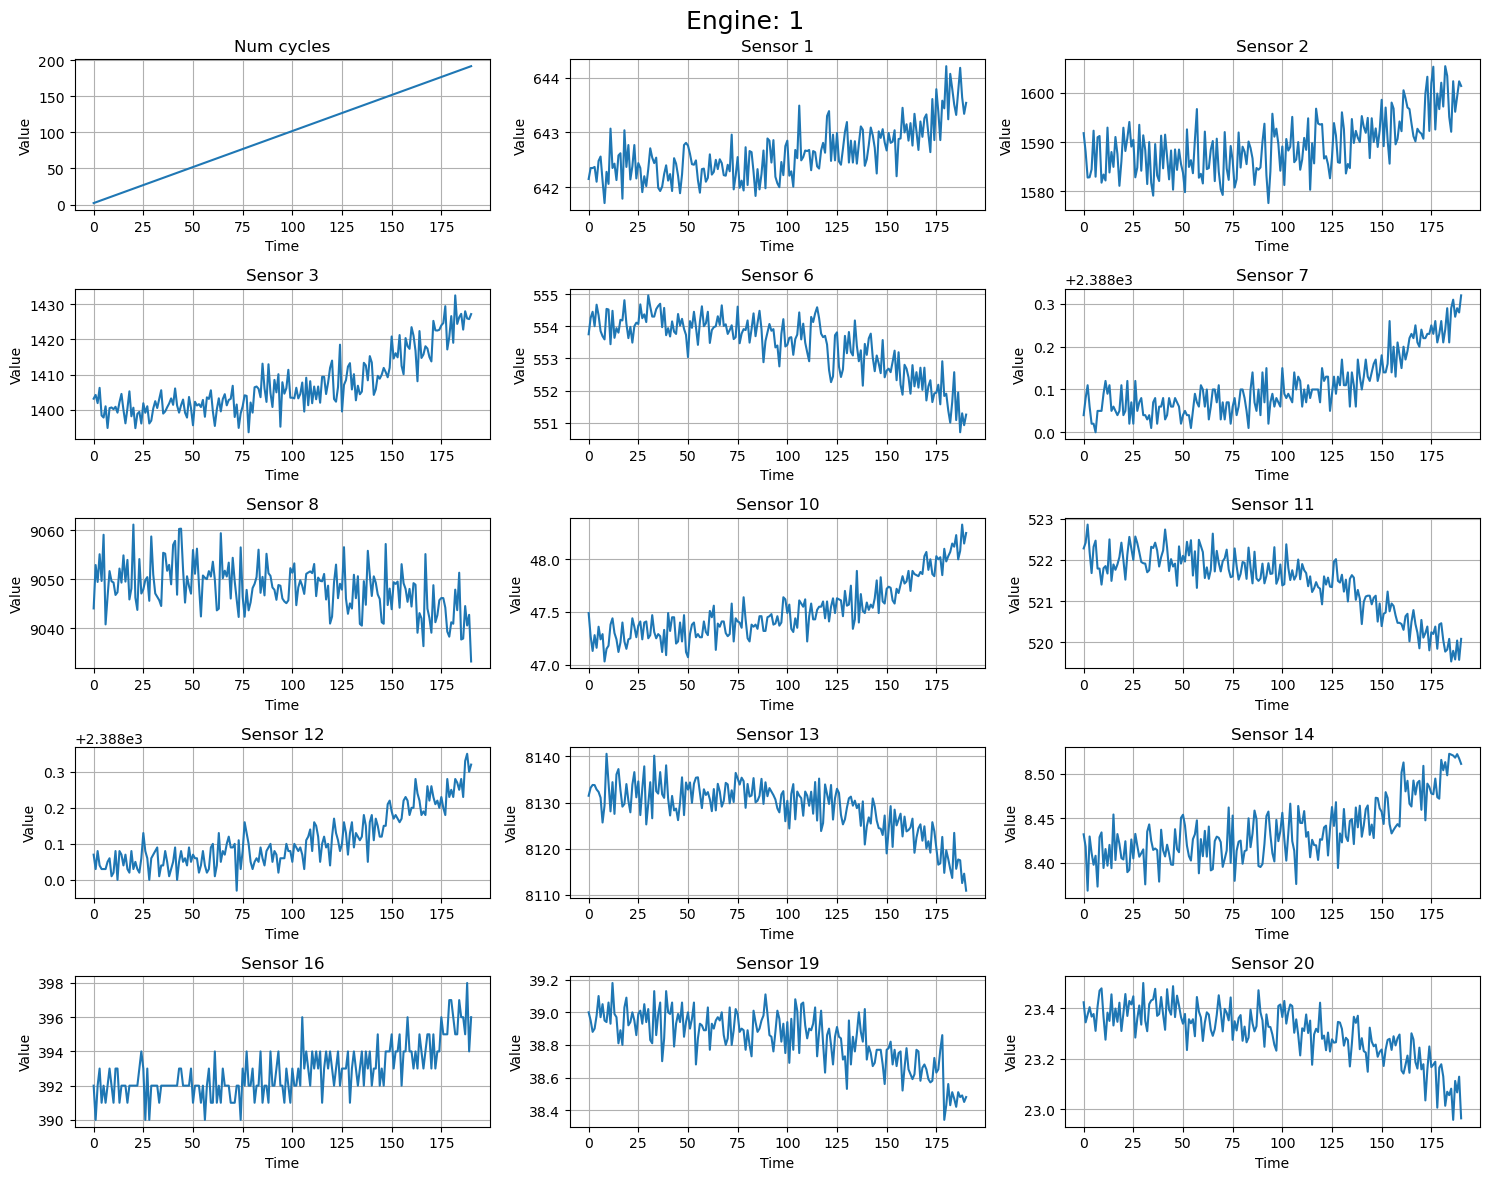

In [260]:
plot_engine_vs_sensors(train_df, 1)

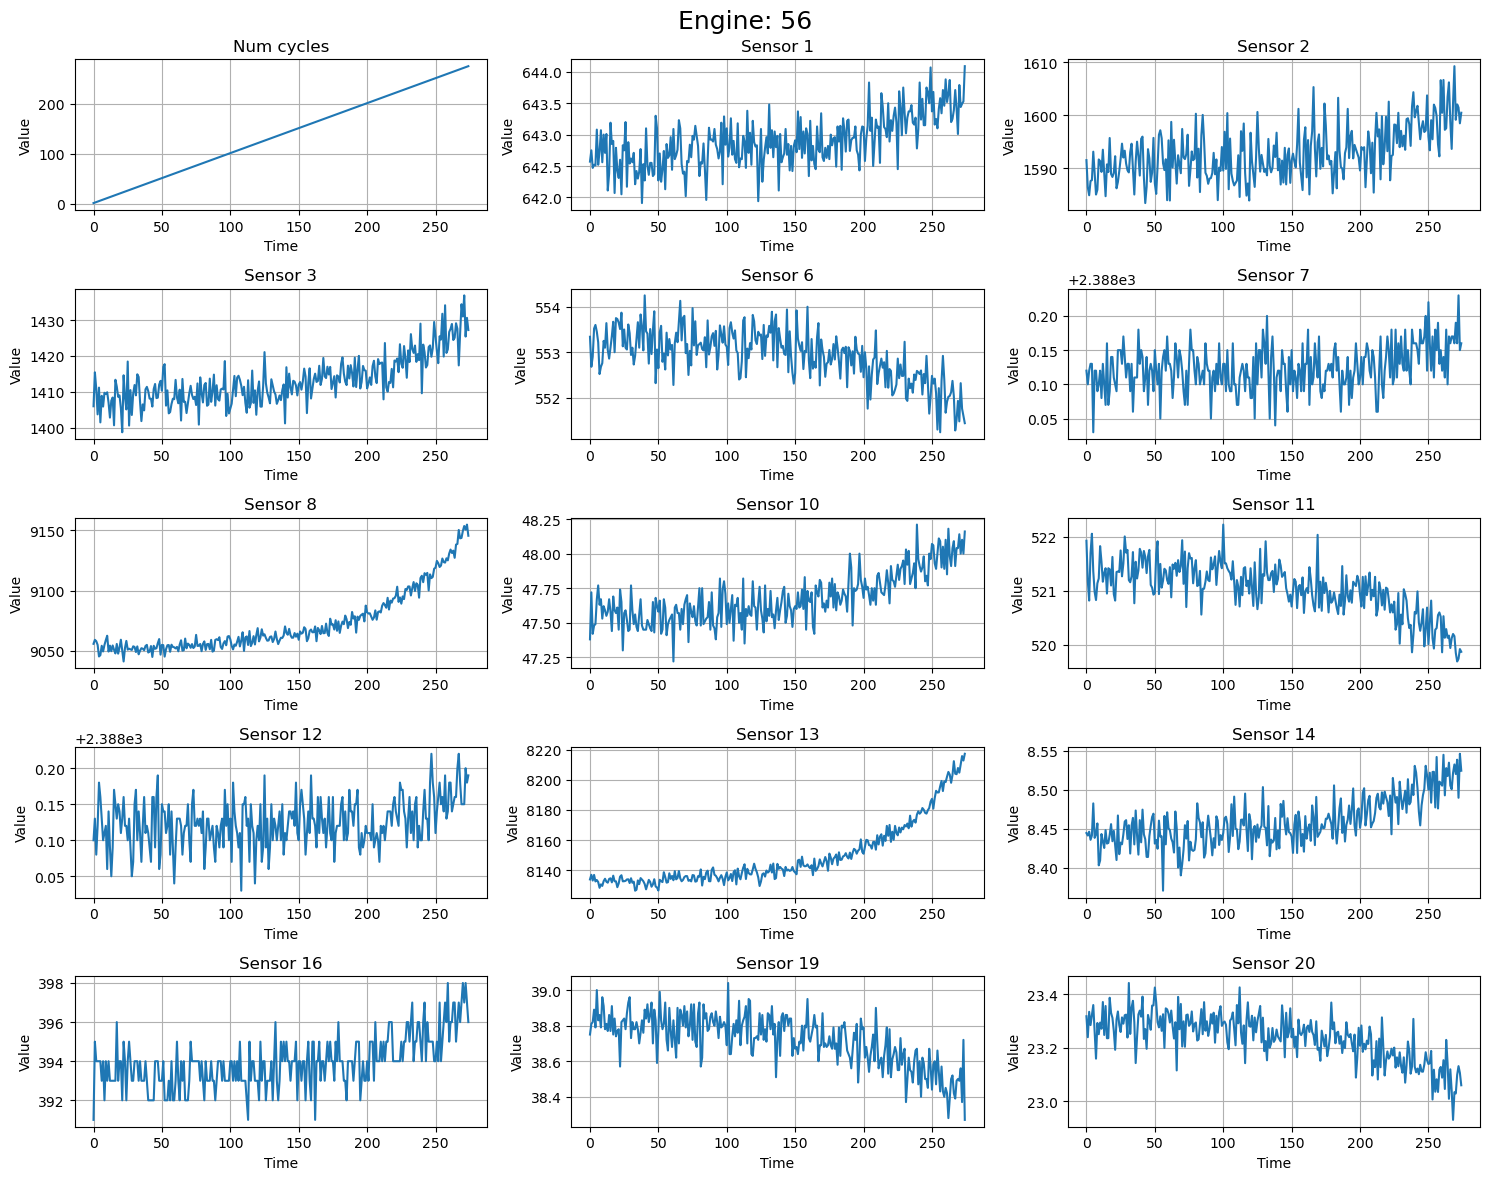

In [261]:
plot_engine_vs_sensors(train_df, 56)

In [262]:
train_df.describe()

Engine no    Num cycles      Sensor 1      Sensor 2      Sensor 3  \
count  20630.000000  20630.000000  20630.000000  20630.000000  20630.000000   
mean      51.509016    108.813088    642.680975   1590.523159   1408.934186   
std       29.226226     68.878570      0.500029      6.131295      9.000636   
min        1.000000      1.000000    641.210000   1571.040000   1382.250000   
25%       26.000000     52.000000    642.330000   1586.260000   1402.360000   
50%       52.000000    104.000000    642.640000   1590.100000   1408.040000   
75%       77.000000    156.000000    643.000000   1594.380000   1414.557500   
max      100.000000    362.000000    644.530000   1616.910000   1441.490000   

           Sensor 6      Sensor 7      Sensor 8     Sensor 10     Sensor 11  \
count  20630.000000  20630.000000  20630.000000  20630.000000  20630.000000   
mean     553.367663   2388.096653   9065.243864     47.541172    521.413458   
std        0.885087      0.070987     22.083016      0.267093      0.737569   
min      549.850000   2387.900000   9021.730000     46.850000    518.690000   
25%      552.810000   2388.050000   9053.100000     47.350000    520.960000   
50%      553.440000   2388.090000   9060.660000     47.510000    521.480000   
75%      554.010000   2388.140000   9069.420000     47.700000    521.950000   
max      556.060000   2388.560000   9244.590000     48.530000    523.380000   

          Sensor 12     Sensor 13     Sensor 14     Sensor 16     Sensor 19  \
count  20630.000000  20630.000000  20630.000000  20630.000000  20630.000000   
mean    2388.096156   8143.752971      8.442147    393.210713     38.816259   
std        0.071919     19.076605      0.037506      1.548778      0.180743   
min     2387.880000   8099.940000      8.324900    388.000000     38.140000   
25%     2388.040000   8133.242500      8.414900    392.000000     38.700000   
50%     2388.090000   8140.540000      8.438950    393.000000     38.830000   
75%     2388.140000   8148.310000      8.465600    394.000000     38.950000   
max     2388.560000   8293.720000      8.584800    400.000000     39.430000   

          Sensor 20  
count  20630.000000  
mean      23.289699  
std        0.108250  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400

In [263]:
from typing import List

def engine_vs_single_sensor(engine_numbers: List[int], sensor_number: int):
    """
    Plots a grid (5, N) with engine-cycle number vs sensor-data for a given sensor.

    Args:
        engine_numbers (List[int]): List of engine numbers to plot (should be a multiple of 5 for clean layout).
        sensor_number (int): Sensor number (e.g., 1 for "Sensor 1").
    """
    if len(engine_numbers) % 5 != 0:
        raise ValueError("engine_numbers list length should be a multiple of 5 for a clean (5, N) grid layout.")
    
    num_cols = len(engine_numbers) // 5
    fig, axes = plt.subplots(5, num_cols, figsize=(num_cols * 4, 15))
    axes = axes.flatten()

    for i, engine_no in enumerate(engine_numbers):
        data = train_df[train_df["Engine no"] == engine_no][f"Sensor {sensor_number}"]
        axes[i].plot(data.values)
        axes[i].set_title(f"Engine {engine_no}")
        axes[i].set_xlabel("Cycle")
        axes[i].set_ylabel(f"Sensor {sensor_number}")
        axes[i].grid(True)

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(f"Sensor {sensor_number} across Engines", fontsize=18)
    plt.show()

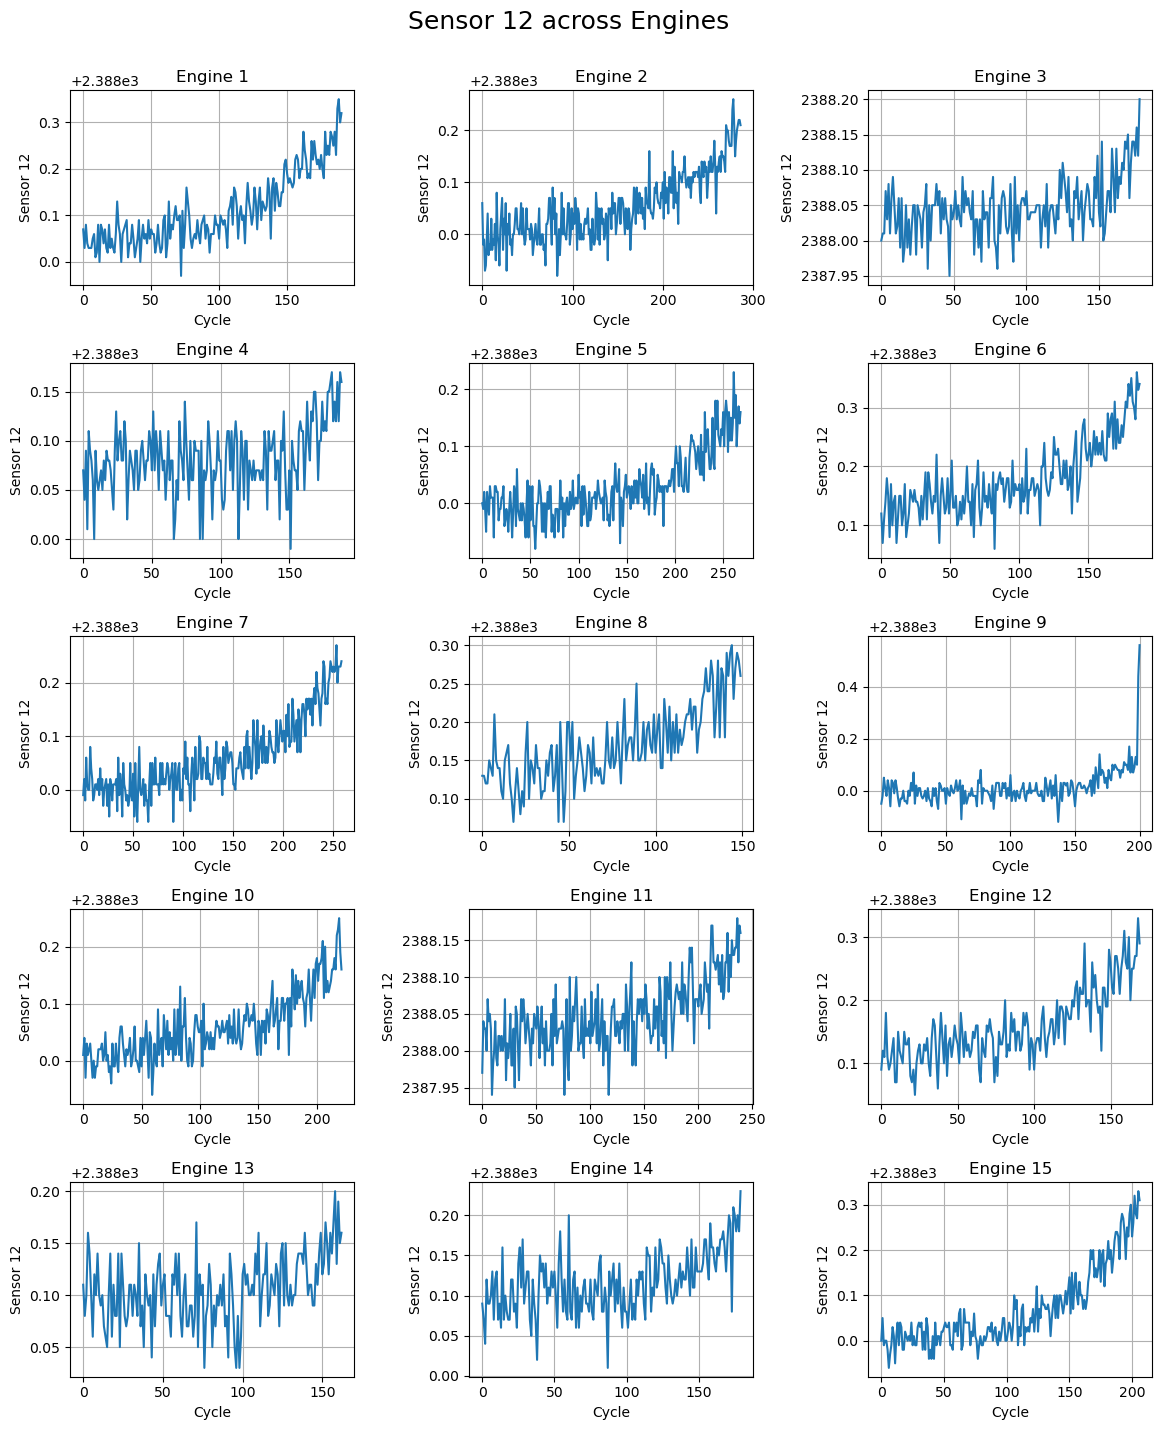

In [264]:
engine_vs_single_sensor(range(1, 15+1), 12)

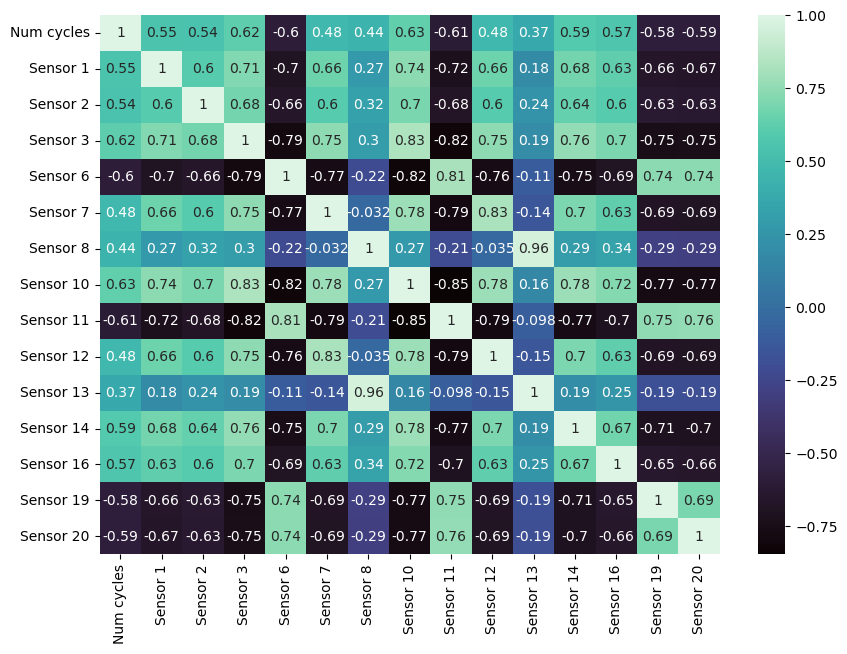

In [265]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(train_df.drop(["Engine no"], axis=1).corr(), cmap="mako", annot=True)
plt.show();

**We have a corr-mat, we CAN do stuff with it. But we dont't know what to do with it.**

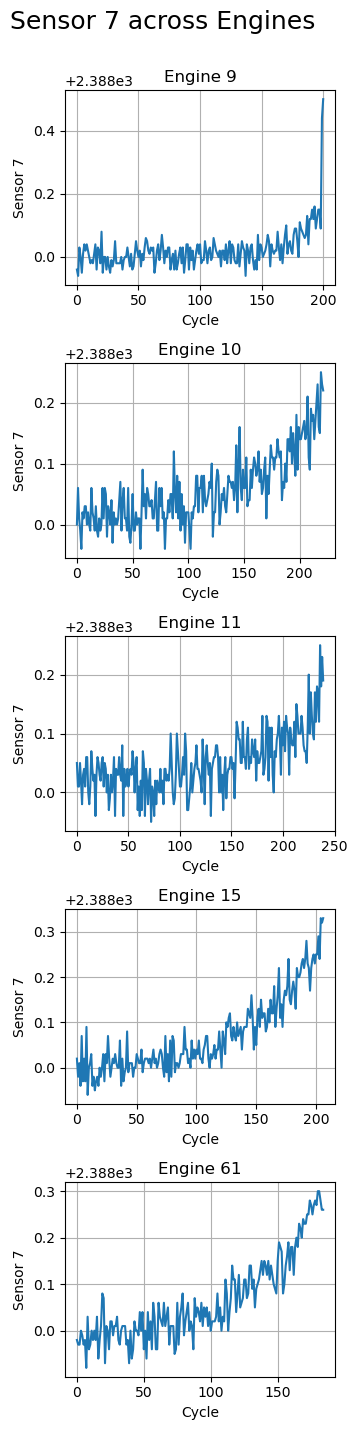

In [266]:
engine_vs_single_sensor([9, 10, 11, 15, 61], 7)

# Data splits

In [297]:
train_df.head(3)

Engine no  Num cycles  Sensor 1  Sensor 2  Sensor 3  Sensor 6  Sensor 7  \
0          1           2    642.15   1591.82   1403.14    553.75   2388.04   
1          1           3    642.35   1587.99   1404.20    554.26   2388.08   
2          1           4    642.35   1582.79   1401.87    554.45   2388.11   

   Sensor 8  Sensor 10  Sensor 11  Sensor 12  Sensor 13  Sensor 14  Sensor 16  \
0   9044.07      47.49     522.28    2388.07    8131.49     8.4318        392   
1   9052.94      47.27     522.42    2388.03    8133.23     8.4178        390   
2   9049.48      47.13     522.86    2388.08    8133.83     8.3682        392   

   Sensor 19  Sensor 20  
0      39.00    23.4236  
1      38.95    23.3442  
2      38.88    23.3739

In [298]:
train_df.shape

(20630, 16)

In [299]:
from sklearn.model_selection import train_test_split
X = train_df.drop(["Engine no", "Num cycles"], axis=1).to_numpy()
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, shuffle=True)

X.shape, X_train.shape, X_test.shape

((20630, 14), (16504, 14), (4126, 14))

In [300]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_min_max = MinMaxScaler()
scaler_std = StandardScaler()

X_train_min_max = scaler_min_max.fit_transform(X_train)
X_train_std = scaler_std.fit_transform(X_train)
X_test_min_max = scaler_min_max.transform(X_test)
X_test_std = scaler_std.transform(X_test)

X_train_min_max.shape, X_train_std.shape, X_test_min_max.shape, X_test_std.shape

((16504, 14), (16504, 14), (4126, 14), (4126, 14))

In [301]:
min(X_train_min_max.flatten()), max(X_train_min_max.flatten())

(np.float64(0.0), np.float64(1.0))

In [302]:
min(X_train_std.flatten()), max(X_train_std.flatten())

(np.float64(-3.9503673538592574), np.float64(8.080406344554282))

# Clustering

|Clustering algo|
|-|
|KMeans|
|Agglomerative|
|DBSCAN|
|HDBSCAN|



## KMeans

In [272]:
from sklearn.cluster import KMeans
model_1 = KMeans(
    n_clusters=5,
    max_iter=300,
    random_state=42,
)
model_1.fit(X_train)

KMeans(n_clusters=5, random_state=42)

In [273]:
labels_1 = model_1.predict(X_train)
labels_1.shape, labels_1[:5]

((16504,), array([3, 3, 1, 0, 0], dtype=int32))

In [274]:
model_1_min_max = KMeans(
    n_clusters=5,
    max_iter=300,
    random_state=42,
)
model_1_min_max.fit(X_train_min_max)

KMeans(n_clusters=5, random_state=42)

In [275]:
labels_1_min_max = model_1_min_max.predict(X_train_min_max)
labels_1_min_max.shape, labels_1_min_max[:5]

((16504,), array([3, 3, 4, 0, 0], dtype=int32))

In [276]:
model_1_std = KMeans(
    n_clusters=5,
    max_iter=300,
    random_state=42,
)
model_1_std.fit(X_train_std)

KMeans(n_clusters=5, random_state=42)

In [277]:
labels_1_std = model_1_std.predict(X_train_std)
labels_1_std.shape, labels_1_std[:5]

((16504,), array([2, 2, 0, 0, 0], dtype=int32))

**PCA**

In [278]:
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
import seaborn as sns

from sklearn.decomposition import PCA
def plot_pca_2d(X_data, labels, title):
    """
    Plots a PCA plot in 2D only
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)
    pca_df = pd.DataFrame(data=X_pca,
                          columns=['PC1', 'PC2'])
    pca_df['target'] = labels
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set2')
    plt.title(title)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
    plt.legend()
    plt.tight_layout()
    plt.show();

def plot_pca_2d_density(X_data, labels, title):
    """
    Plots a PCA plot in 2D with opacity based on density
    """
    # PCA transformation
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    pca_df['target'] = labels

    # Density estimation
    xy = np.vstack([pca_df['PC1'], pca_df['PC2']])
    z = gaussian_kde(xy)(xy)
    pca_df['density'] = z

    # Normalize density to [0.1, 1] for alpha values (avoid fully invisible points)
    density_scaled = (z - z.min()) / (z.max() - z.min())
    pca_df['alpha'] = 0.1 + 0.9 * density_scaled  # scale between 0.1 and 1

    # Plot
    plt.figure(figsize=(8,6))
    for target_class in pca_df['target'].unique():
        subset = pca_df[pca_df['target'] == target_class]
        plt.scatter(
            subset['PC1'], subset['PC2'],
            label=target_class,
            alpha=subset['alpha'],
            edgecolor='none'
        )

    plt.title(title)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
    plt.legend()
    plt.tight_layout()
    plt.show();

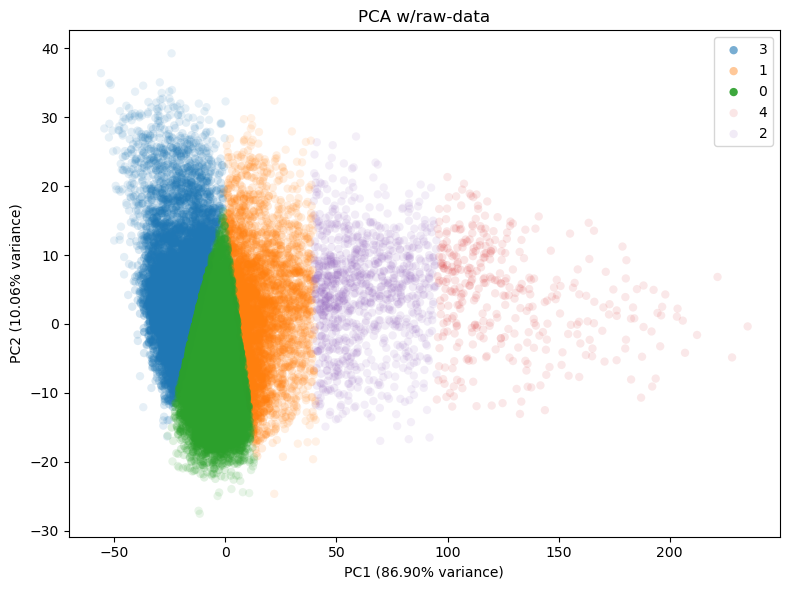

In [279]:
# Plot for the "normal" model
plot_pca_2d_density(X_train, labels_1, "PCA w/raw-data")

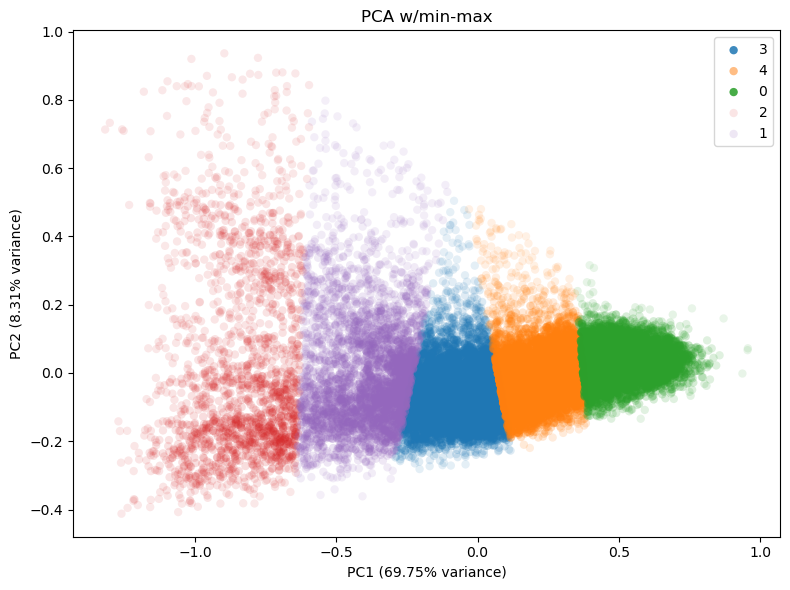

In [280]:
# Plot for the "min-max" model
plot_pca_2d_density(X_train_min_max, labels_1_min_max, "PCA w/min-max")

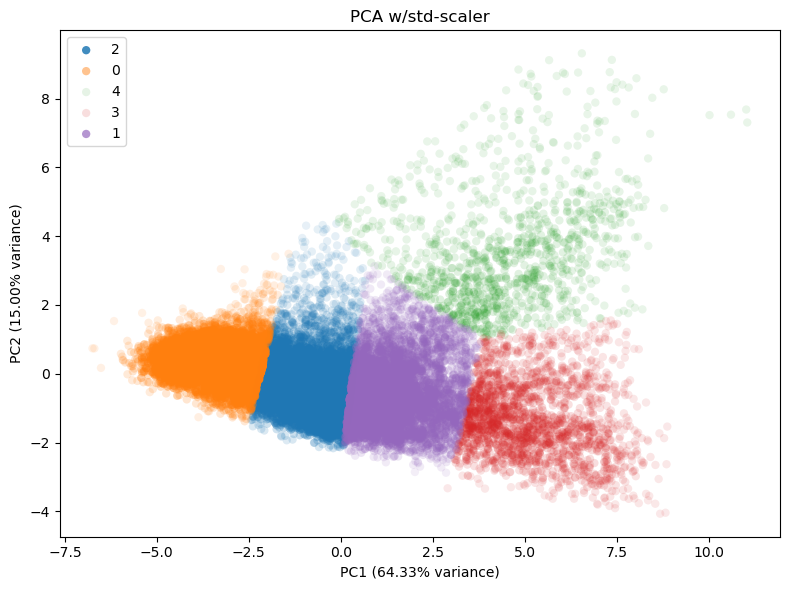

In [281]:
# Plot for the "normal" model
plot_pca_2d_density(X_train_std, labels_1_std, "PCA w/std-scaler")

# Finding stage(s)

## Weights using CORR

$score=\sum_{i=1}^n w_i s_i$

We can find the weights by using the corr-bw the sensor and the RUL (or) domain specific knowledge.\
The equation for 'stage' is also similar to that of linear-regression, perhaps we can merge the 2 algorithms for finding appropriate values for the weights ($w_i$)

In [383]:
### Finding wi's using corr
#sensor_names = train_df.columns.difference(["Engine no", "Num cycles"]).tolist()
sensor_names = train_df.keys()[2:].tolist()

correlations_raw = train_df[sensor_names].corrwith(train_df["Num cycles"])
correlations_filtered = train_df[sensor_names].corrwith(train_df["Num cycles"]).abs()
weights_raw = correlations_raw / correlations_raw.sum()
weights_filtered = correlations_filtered / correlations_filtered.sum()


In [384]:
weights_raw, weights_raw.to_numpy(), len(weights_raw)

(Sensor 1     0.189634
 Sensor 2     0.187610
 Sensor 3     0.215404
 Sensor 6    -0.205514
 Sensor 7     0.164157
 Sensor 8     0.153120
 Sensor 10    0.218799
 Sensor 11   -0.210854
 Sensor 12    0.164680
 Sensor 13    0.127722
 Sensor 14    0.203027
 Sensor 16    0.195545
 Sensor 19   -0.201262
 Sensor 20   -0.202067
 dtype: float64,
 array([ 0.18963429,  0.18760971,  0.2154036 , -0.20551389,  0.16415722,
         0.15312031,  0.21879941, -0.21085424,  0.16467955,  0.12772177,
         0.20302658,  0.19554506, -0.2012624 , -0.20206698]),
 14)

In [385]:
weights_filtered, weights_filtered.to_numpy()

(Sensor 1     0.071848
 Sensor 2     0.071081
 Sensor 3     0.081611
 Sensor 6     0.077864
 Sensor 7     0.062195
 Sensor 8     0.058013
 Sensor 10    0.082898
 Sensor 11    0.079887
 Sensor 12    0.062393
 Sensor 13    0.048391
 Sensor 14    0.076922
 Sensor 16    0.074087
 Sensor 19    0.076253
 Sensor 20    0.076558
 dtype: float64,
 array([0.07184764, 0.07108057, 0.08161097, 0.07786401, 0.06219502,
        0.05801341, 0.08289756, 0.07988734, 0.06239292, 0.04839055,
        0.07692163, 0.07408708, 0.07625323, 0.07655807]))

In [386]:
X_train_std.shape, weights_raw.shape

((16504, 14), (14,))

(16504,)
(16504,)


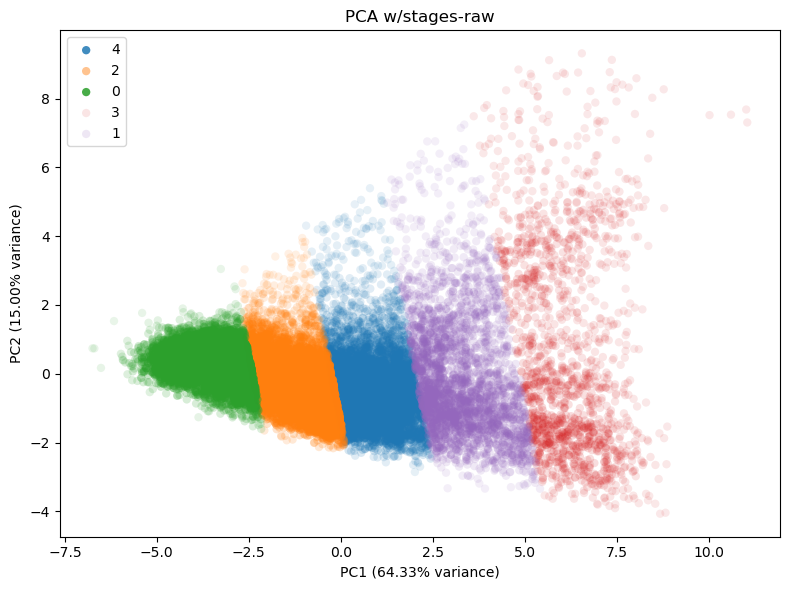

In [387]:
from sklearn.cluster import KMeans
kmeans_1d = KMeans(n_clusters=5, max_iter=300, random_state=42)  # Make model

scores_raw = X_train_std @ weights_raw.values
print(scores_raw.shape)

stages = kmeans_1d.fit_predict(scores_raw.reshape(-1, 1))
print(stages.shape)

plot_pca_2d_density(X_train_std, stages, "PCA w/stages-raw")

**The data is almost evenly split!** It shouldn't, there must be a clear imbalance in the number of samples from one cluster to another.

The cluster numbers here are not the stage-numbers, they are the centeroid number. So we will have to create a mapping from these numbers to stage-numbers. But first, we need to find a clustering method that induces this imbalance from stage-to-stage.

*Why is imbalance a good thing: simply put, there will be more engines in stage-0 (good) than stage-4 (bad) as the number of samples/entries in stage-4 are much-much lower than stage-0 worthy entries.*

(16504,)
(16504,)


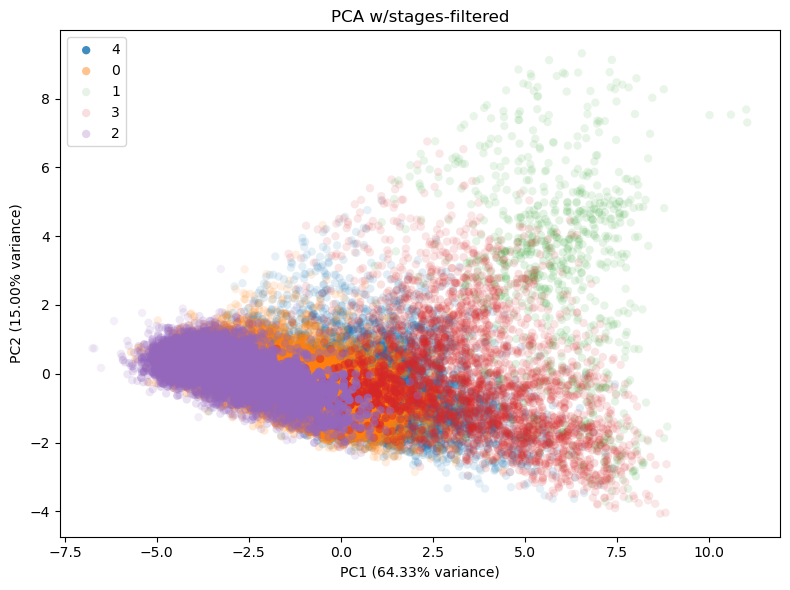

In [388]:
kmeans_1d = KMeans(n_clusters=5, max_iter=300, random_state=42)  # Make model

scores_filtered = X_train_std @ weights_filtered.values
print(scores_raw.shape)

stages = kmeans_1d.fit_predict(scores_filtered.reshape(-1, 1))
print(stages.shape)

plot_pca_2d_density(X_train_std, stages, "PCA w/stages-filtered")

In [389]:
np.unique_counts(stages)

UniqueCountsResult(values=array([0, 1, 2, 3, 4], dtype=int32), counts=array([5459,  767, 3222, 2449, 4607]))

In [390]:
# Mapping: model pred-stage -> actual-stage
mapping = [0, 4, 2, 3, 1]
#{
#    0: 0
#    1: 4
#    2: 2
#    3: 3
#    4: 1
#}


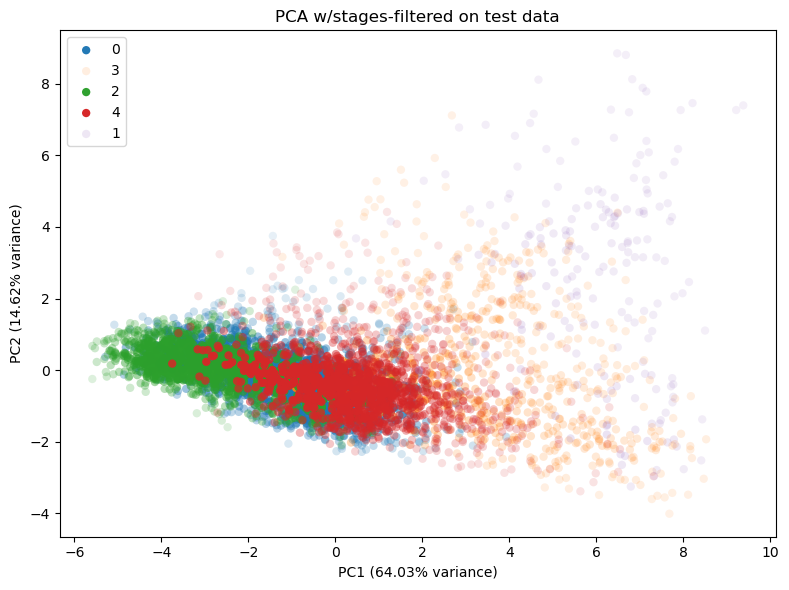

In [391]:
stages_pred_test = X_test_std @ weights_filtered
stages_pred_test = kmeans_1d.predict(stages_pred_test.reshape(-1, 1))
plot_pca_2d_density(X_test_std, stages_pred_test, "PCA w/stages-filtered on test data")

In [392]:
np.unique_counts(stages_pred_test)

UniqueCountsResult(values=array([0, 1, 2, 3, 4], dtype=int32), counts=array([1393,  189,  861,  588, 1095]))

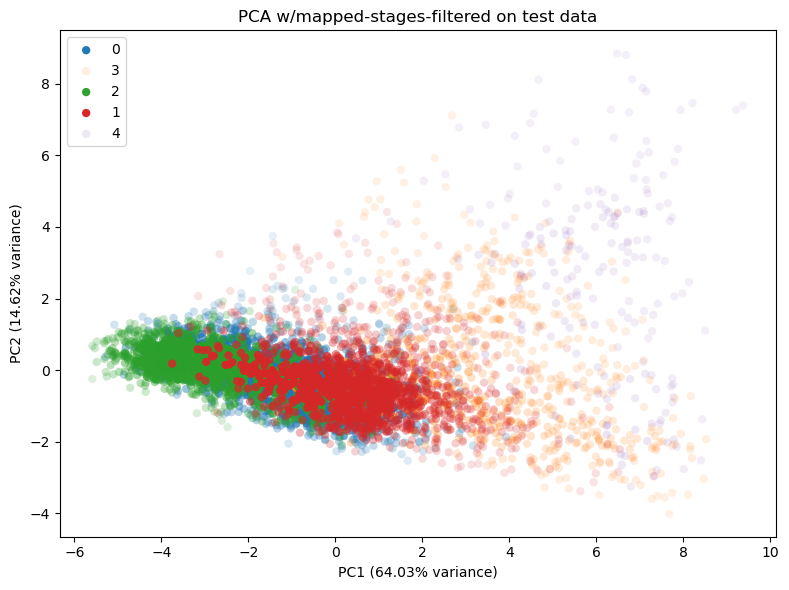

In [393]:
# Mapping the outputs to "make sense"
stages_mapped = [mapping[i] for i in stages_pred_test]
plot_pca_2d_density(X_test_std, stages_mapped, "PCA w/mapped-stages-filtered on test data")

In [394]:
np.unique_counts(np.array(stages_mapped))

UniqueCountsResult(values=array([0, 1, 2, 3, 4]), counts=array([1393, 1095,  861,  588,  189]))

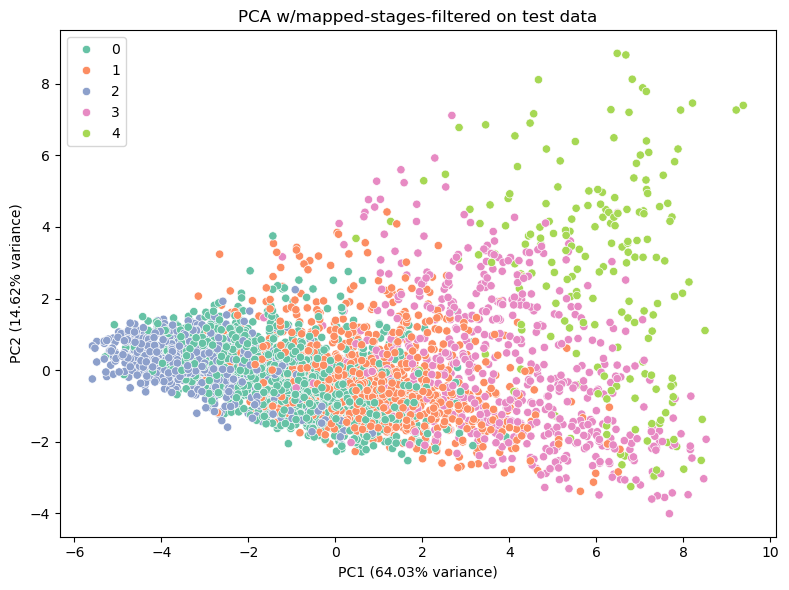

In [395]:
# For fun, ignore it ig
plot_pca_2d(X_test_std, stages_mapped, "PCA w/mapped-stages-filtered on test data")

In [396]:
mapping

[0, 4, 2, 3, 1]

In [397]:
np.unique_counts(stages_mapped)

UniqueCountsResult(values=array([0, 1, 2, 3, 4]), counts=array([1393, 1095,  861,  588,  189]))

In [398]:
class Model():
    """
    Final model for Phase-1 (clustering stages)

    NOTE: Run previous cells for 'Model' to work.
    """
    def __init__(self):
        self.train = X_train_std
        self.test = X_test_std
        self.mapping = mapping
        self.weights = weights_filtered  # Using filtered weights
        self.scaler = scaler_std
        self.classifier = kmeans_1d
    
    def predict(self, x):
        """
        Args:
            x (np.ndarray): input features (ndim=2)
        """
        x_std = self.scaler.transform(x)
        stages = x_std @ self.weights
        stages = self.classifier.predict(stages.reshape(-1, 1))
        stages = [mapping[i] for i in stages]
        return stages


In [399]:
model = Model()
preds = model.predict(X_test)

In [400]:
# We expect the following to hold true
stages_mapped == preds

True

## Understand what the model is doing

In [401]:
kmeans_1d.cluster_centers_

array([[-0.13206977],
       [ 0.75836244],
       [-0.35554599],
       [ 0.36402972],
       [ 0.08265365]])

In [402]:
mapping

[0, 4, 2, 3, 1]

In [403]:
scores = X_train_std @ weights_filtered
scores[:5]

array([-0.01504642,  0.08932047, -0.17870431, -0.09923929, -0.1790556 ])

In [404]:
[mapping[i] for i in kmeans_1d.predict(scores[:5].reshape(-1, 1))]

[1, 1, 0, 0, 0]

In [405]:
min(scores), max(scores)

(np.float64(-0.7310403210591166), np.float64(2.083403062101798))

In [406]:
engine_1_data = scaler_std.transform(train_df[train_df["Engine no"] == 1][sensor_names].to_numpy())
scores = engine_1_data @ weights_filtered
pred_classes = kmeans_1d.predict(scores.reshape(-1, 1))
pred_classes

array([0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 4, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 4, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 4, 0, 4, 2, 0, 2, 4, 4, 0, 0, 4, 0,
       0, 4, 4, 4, 0, 2, 0, 4, 0, 0, 4, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 4,
       0, 2, 2, 4, 4, 4, 0, 4, 0, 0, 4, 4, 2, 0, 0, 4, 0, 0, 4, 0, 4, 4,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 0, 3, 4, 3,
       3, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3], dtype=int32)

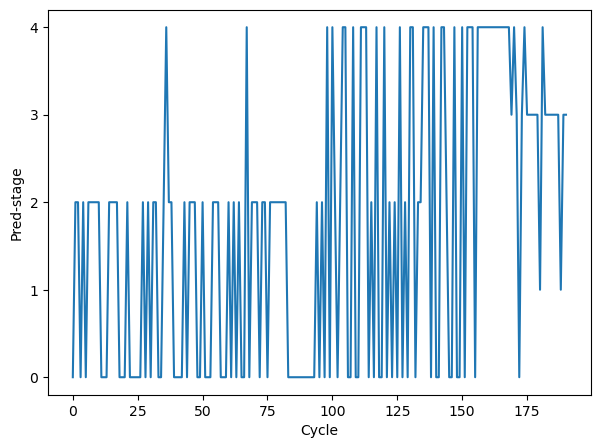

In [408]:
plt.figure(figsize=(7, 5))
plt.plot(range(0, len(pred_classes)), pred_classes)
plt.xlabel("Cycle")
plt.ylabel("Pred-stage")
plt.yticks([0, 1, 2, 3, 4])
plt.show();

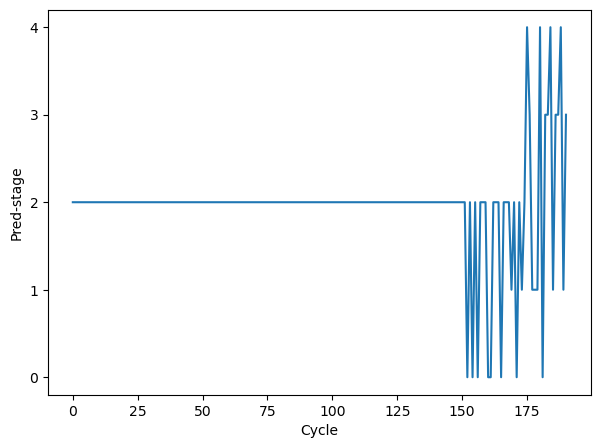

In [415]:
### Finding wi's using corr(s)
# 1. Find weights
correlations = train_df[sensor_names].corrwith(train_df["Num cycles"]).abs()
weights = correlations / correlations.sum()
# 2. scores and model
scores = X_train_std @ weights
scaler = MinMaxScaler()
scores = scaler.fit_transform(scores.reshape(-1, 1))

kmeans_1d = KMeans(n_clusters=5, max_iter=300, random_state=42)
preds = kmeans_1d.fit_predict(scores.reshape(-1, 1))

unique, counts = np.unique(preds, return_counts=True)
sorted_cluster_ids = [x for _, x in sorted(zip(counts, unique))]
mapping = {cluster_id: stage for stage, cluster_id in enumerate(sorted_cluster_ids[::-1])}

engine_1_data = scaler_std.transform(train_df[train_df["Engine no"] == 1][sensor_names].to_numpy())

scores = engine_1_data @ weights_filtered
pred_classes = kmeans_1d.predict(scores.reshape(-1, 1))
pred_classes = [mapping[i] for i in pred_classes]

plt.figure(figsize=(7, 5))
plt.plot(range(0, len(pred_classes)), pred_classes)
plt.xlabel("Cycle")
plt.ylabel("Pred-stage")
plt.yticks([0, 1, 2, 3, 4])
plt.show();

## Weights using STD

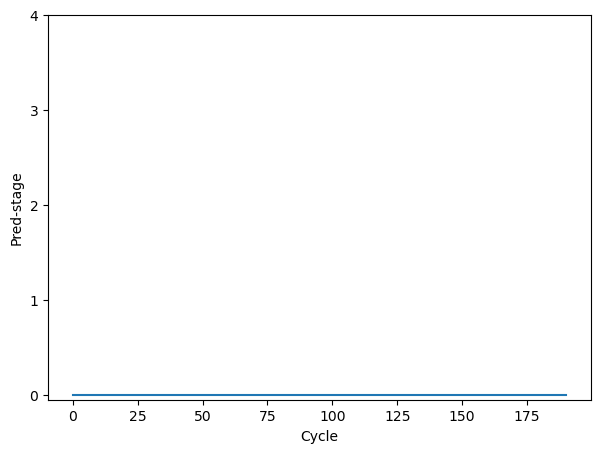

In [418]:
### Finding wi's using std
weights_std = train_df[sensor_names].std()

scores = X_train_std @ weights_std
kmeans_1d_std = KMeans(n_clusters=5, max_iter=300, random_state=42)
preds = kmeans_1d_std.fit_predict(scores.reshape(-1, 1))

unique, counts = np.unique(preds, return_counts=True)
sorted_cluster_ids = [x for _, x in sorted(zip(counts, unique))]
mapping = {cluster_id: stage for stage, cluster_id in enumerate(sorted_cluster_ids[::-1])}


engine_1_data = scaler_std.transform(train_df[train_df["Engine no"] == 1][sensor_names].to_numpy())

scores = engine_1_data @ weights_filtered
pred_classes = kmeans_1d_std.predict(scores.reshape(-1, 1))
pred_classes = [mapping[i] for i in pred_classes]

plt.figure(figsize=(7, 5))
plt.plot(range(0, len(pred_classes)), pred_classes)
plt.xlabel("Cycle")
plt.ylabel("Pred-stage")
plt.yticks([0, 1, 2, 3, 4])
plt.show();

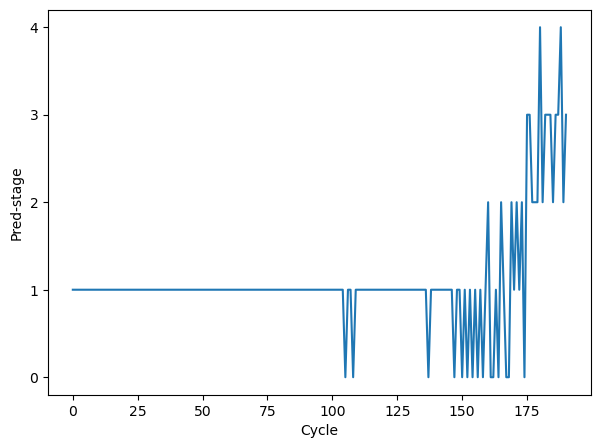

In [419]:
# NOTE: same as above but scaling the scores
from sklearn.preprocessing import MinMaxScaler
### Finding wi's using std
weights_std = train_df[sensor_names].std()

scaler = MinMaxScaler()
scores = X_train_std @ weights_std
scores = scaler.fit_transform(scores.reshape(-1, 1))
kmeans_1d_std = KMeans(n_clusters=5, max_iter=300, random_state=42)
preds = kmeans_1d_std.fit_predict(scores.reshape(-1, 1))

unique, counts = np.unique(preds, return_counts=True)
sorted_cluster_ids = [x for _, x in sorted(zip(counts, unique))]
mapping = {cluster_id: stage for stage, cluster_id in enumerate(sorted_cluster_ids[::-1])}


engine_1_data = scaler_std.transform(train_df[train_df["Engine no"] == 1][sensor_names].to_numpy())

scores = engine_1_data @ weights_filtered
pred_classes = kmeans_1d_std.predict(scores.reshape(-1, 1))
pred_classes = [mapping[i] for i in pred_classes]

plt.figure(figsize=(7, 5))
plt.plot(range(0, len(pred_classes)), pred_classes)
plt.xlabel("Cycle")
plt.ylabel("Pred-stage")
plt.yticks([0, 1, 2, 3, 4])
plt.show();

## Weights using PCA (1 component)

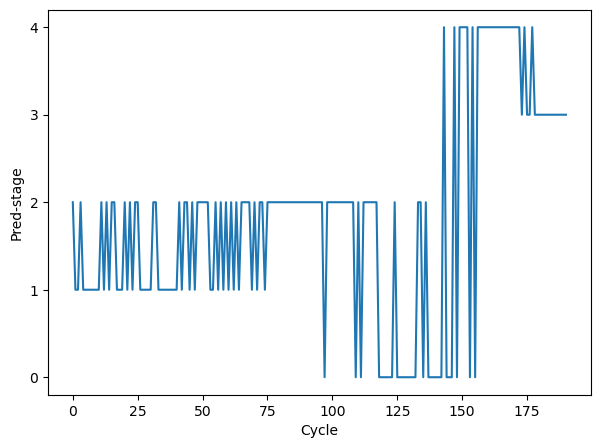

In [433]:
# 1. Fit PCA
pca = PCA(n_components=1)
scores = pca.fit_transform(X_train_std).flatten()  # shape (n_samples,)

# 2. Scale scores
scaler = MinMaxScaler()
scores = scaler.fit_transform(scores.reshape(-1, 1)).flatten()

# 3. Cluster scores
kmeans_1d_pca = KMeans(n_clusters=5, max_iter=300, random_state=42)
kmeans_1d_pca.fit(scores.reshape(-1, 1))

engine_1_data = scaler_std.transform(train_df[train_df["Engine no"] == 1][sensor_names].to_numpy())
scores = pca.transform(engine_1_data)
scores = scaler.transform(scores.reshape(-1, 1)).flatten()
pred_classes = kmeans_1d_pca.predict(scores.reshape(-1, 1))
pred_classes = [mapping[i] for i in pred_classes]

plt.figure(figsize=(7, 5))
plt.plot(range(0, len(pred_classes)), pred_classes)
plt.xlabel("Cycle")
plt.ylabel("Pred-stage")
plt.yticks([0, 1, 2, 3, 4])
plt.show();

## Scores and DBSCAN for mapping

In [437]:
scores.shape, X_train_std.shape, train_df.shape

((16504,), (16504, 14), (20630, 16))

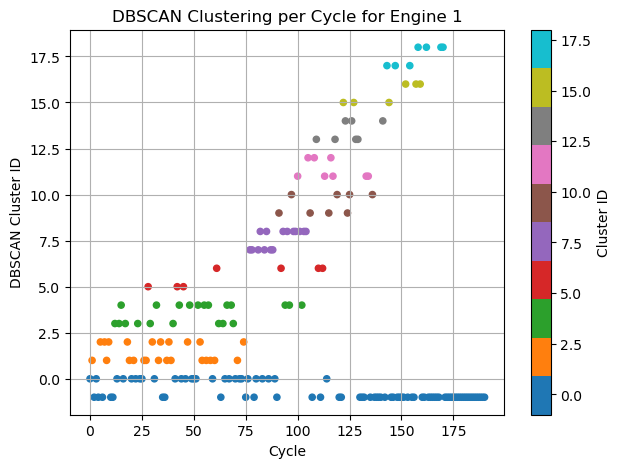

In [442]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
scores_train = pca.fit_transform(X_train_std).flatten()

engine_1_data = scaler_std.transform(train_df[train_df["Engine no"] == 1][sensor_names].to_numpy())
scores_engine_1 = pca.transform(engine_1_data).flatten()

# DBSCAN on engine 1
db_engine_1 = DBSCAN(eps=0.05, min_samples=3)
clusters_engine_1 = db_engine_1.fit_predict(scores_engine_1.reshape(-1, 1))

plt.figure(figsize=(7, 5))
plt.scatter(range(len(clusters_engine_1)), clusters_engine_1, c=clusters_engine_1, cmap="tab10", s=20)
plt.xlabel("Cycle")
plt.ylabel("DBSCAN Cluster ID")
plt.title("DBSCAN Clustering per Cycle for Engine 1")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()


# All in a single class

This will be used for Phase-2

In [200]:
class Phase_1():
    def __init__(self, data_dir, seed):
        self.__is_data_built = False
        self.__is_weights = False
        self.__is_sensor_model = False
        self.__is_stage_model = False
        
        self.df, self.X_train, self.X_test, self.scaler = self._build_data_from_dir(data_dir)   # Data
        self.sensor_clustering_model = self._sensor_clustering_model(seed = seed)  # Sensor-model
        self.sensor_weights = self._create_weights()                               # Sensor-weights
        self.stage_clustering_model = self._stage_clustering_model(seed = seed)    # Stage-model
        
        self.mapping = self._build_mapping()                                       # Mapping stages

        print(f"Status: ready")

    def _build_data_from_dir(self, path):
        df = pd.read_csv(data_dir, delimiter=" ")
        df.columns = (
            ["Engine no", "Num cycles", "Operating 1", "Operating 2", "Operating 3", "Operating 4"] +
            [f"Sensor {i}" for i in range(22)]  # 28 - 6
        )
        train_df = df.drop(
            ["Operating 1", "Operating 2", "Operating 3", "Operating 4"] +
            [f"Sensor {i}" for i in [3, 4, 8, 14, 16, 17, 20, 21]],
            axis=1,
            inplace=False
        )
        
        X = train_df.drop(["Engine no", "Num cycles"], axis=1).to_numpy()
        X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, shuffle=True)
        
        scaler = StandardScaler()
        
        X_train_std = scaler.fit_transform(X_train)
        X_test_std = scaler.transform(X_test)

        self.__is_data_built = True
        
        return train_df, X_train_std, X_test_std, scaler

    def _sensor_clustering_model(self, seed: int):
        assert self.__is_data_built, f"Data not built yet."
        model = KMeans(
            n_clusters=5,
            max_iter=300,
            random_state=seed
        )
        model.fit(self.X_train)
        
        self.__is_sensor_model = True
        
        return model
    
    def _create_weights(self):
        sensor_names = self.df.columns.difference(["Engine no", "Num cycles"])
        correlations_filtered = self.df[sensor_names].corrwith(self.df["Num cycles"]).abs()
        weights_filtered = correlations_filtered / correlations_filtered.sum()

        self.__is_weights = True
        
        return weights_filtered

    def _stage_clustering_model(self, seed: int):
        assert self.__is_data_built, f"Data not built yet."
        assert self.__is_weights, f"Build weights before performing stage-clustering."
        
        model = KMeans(
            n_clusters=5,
            max_iter=300,
            random_state=seed,
        )
        scores = self.X_train @ self.sensor_weights.values
        model.fit(scores.reshape(-1, 1))
        
        self.__is_stage_model = True
        
        return model

    def _build_mapping(self):
        assert self.__is_data_built, f"Data not built yet."
        assert self.__is_weights, f"Build weights before performing stage-clustering."
        assert self.__is_sensor_model, f"Sensor model not built yet."
        assert self.__is_stage_model, f"Stage model not built yet."

        scores = self.X_test @ self.sensor_weights.values
        pred_classes = self.stage_clustering_model.predict(scores.reshape(-1, 1))  # Raw predictions on train
        
        unique, counts = np.unique(pred_classes, return_counts=True)
        print(f"[DEBUG] unique: {unique} | counts: {counts}")
        sorted_cluster_ids = [x for _, x in sorted(zip(counts, unique))]  # ascending by count
        cluster_to_stage = {cluster_id: stage for stage, cluster_id in enumerate(sorted_cluster_ids[::-1])}
        
        return cluster_to_stage

    def predict(self, x):
        x_std = self.scaler.transform(x)
        scores = x_std @ self.sensor_weights
        raw_stages = self.stage_clustering_model.predict(scores.reshape(-1, 1))
        final_stages = np.array([self.mapping[cls] for cls in raw_stages])
        return final_stages


model = Phase_1(data_dir, 42)
print(np.unique_counts(model.predict(model.X_train)))
model.mapping

[DEBUG] unique: [0 1 2 3 4] | counts: [1515  476 1069  930  136]
Status: ready
UniqueCountsResult(values=array([1]), counts=array([16504]))


{np.int32(0): 0,
 np.int32(2): 1,
 np.int32(3): 2,
 np.int32(1): 3,
 np.int32(4): 4}

In [196]:
list(model.mapping.keys())

[np.int32(0), np.int32(2), np.int32(3), np.int32(1), np.int32(4)]

In [178]:
mapping

[0, 4, 2, 3, 1]

In [198]:
np.unique_counts(stages_pred_test)

UniqueCountsResult(values=array([0, 1, 2, 3, 4], dtype=int32), counts=array([1393,  189,  861,  588, 1095]))

In [155]:
a, b = np.unique_counts(stages_pred_test)
_mapping = []
for i in range(len(b)):
    pos = np.argmax(b)
    _mapping.append(pos)
    b[pos] = 0
_mapping

[np.int64(0), np.int64(4), np.int64(2), np.int64(3), np.int64(1)]

In [156]:
mapping

[0, 4, 2, 3, 1]

In [1]:
# Function for smoothing of the data

def create_windows(df , window_length, stride) :    
    new_df = []
    smoothing_window = 5  # This is for rolling mean

    
    for eng_id in df['engine_id'].unique():
        df_eng = df[df['engine_id'] == eng_id].reset_index(drop=True)

       
        sensor_cols = [col for col in df_eng.columns if col not in ['engine_id', 'cycle']]

        df_eng[sensor_cols] = (
            df_eng[sensor_cols]
            .rolling(window=smoothing_window, min_periods=1, center=True)
            .mean()
        )

        n_cycles = len(df_eng)

        # Slide windows across cycles
        for start in range(0, n_cycles - window_length + 1, stride):
            end = start + window_length
            window_slice = df_eng.loc[start:end - 1, sensor_cols]

            
            means = window_slice.mean()

            
            window_ = {
                'engine_id': eng_id,
                'start_cycle': int(df_eng.loc[start, 'cycle']),
                'end_cycle': int(df_eng.loc[end - 1, 'cycle'])
            }
            for sensor in sensor_cols:
                window_[f'mean_{sensor}'] = means[sensor]

            new_df.append(window_)

    
    windows_df = pd.DataFrame(new_df)
    return windows_df